In [17]:
import numpy as np
import pandas as pd

df = pd.read_csv('files/GlobalLandTemperaturesByCountry.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [18]:
df.shape

(577462, 4)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [20]:
print(df['Country'].nunique())
print(df['Country'].unique())

243
['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua And Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bonaire, Saint Eustatius And Saba' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Bulgaria' 'Burkina Faso' 'Burma'
 'Burundi' "Côte D'Ivoire" 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros'
 'Congo (Democratic Republic Of The)' 'Congo' 'Costa Rica' 'Croatia'
 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'Denmark (Europe)' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Europe'
 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated State

In [21]:
df['date'] = pd.to_datetime(df['dt'])
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,date
0,1743-11-01,4.384,2.294,Åland,1743-11-01
1,1743-12-01,NaN,NaN,Åland,1743-12-01
2,1744-01-01,NaN,NaN,Åland,1744-01-01
3,1744-02-01,NaN,NaN,Åland,1744-02-01
4,1744-03-01,NaN,NaN,Åland,1744-03-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [25]:
idx = df['date'] >= pd.to_datetime('1970-01-01') 
df = df[idx]
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,date
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


Agrupar por país y fecha para tener promedio y mediana de la temperatura por año

In [30]:
df_avg = df.groupby(['Country', pd.Grouper(key='date', freq='Y')]).agg({'AverageTemperature':[np.mean,np.median]})
df_avg

AverageTemperature         
                                     mean   median
Country     date                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

<AxesSubplot:xlabel='date'>

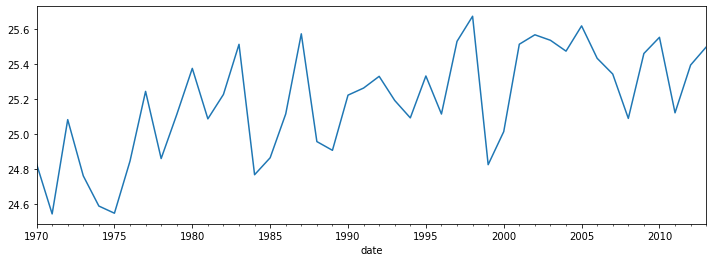

In [45]:
df_avg.xs('Colombia')['AverageTemperature']['median'].plot(figsize=(12,4))